# Episode 6: Compare RSI vs Price Action Trading Strategies in Python

## Step 1: Import Libraries

In [10]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Download historical stock data

In [12]:
api_key = 'YOUR_ALPHA_VANTAGE_KEY' # Replace with your actual key
symbol = 'AAPL'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}&outputsize=full'
response = requests.get(url)
data = response.json()

# Analyize and clean data
df = pd.DataFrame(data['Time Series (Daily)']).T
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df = df.astype(float)
df = df[['4. close']].rename(columns={'4. close': 'Close'})

## Step 3: RSI Strategy

In [17]:
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0).rolling(window=period).mean()
    loss = -delta.clip(upper=0).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['Close'])
df['RSI_Signal'] = 0
df.loc[df['RSI'] < 30, 'RSI_Signal'] = 1
df.loc[df['RSI'] > 70, 'RSI_Signal'] = -1
df['RSI_Position'] = df['RSI_Signal'].shift()

## Step 4: Price Action Breakout Strategy

In [19]:
df['5D_High'] = df['Close'].rolling(window=5).max().shift(1)
df['5D_Low'] = df['Close'].rolling(window=5).min().shift(1)
df['PA_Signal'] = 0
df.loc[df['Close'] > df['5D_High'], 'PA_Signal'] = 1
df.loc[df['Close'] < df['5D_Low'], 'PA_Signal'] = -1
df['PA_Position'] = df['PA_Signal'].shift()

## Step 5: Backtest & Plot

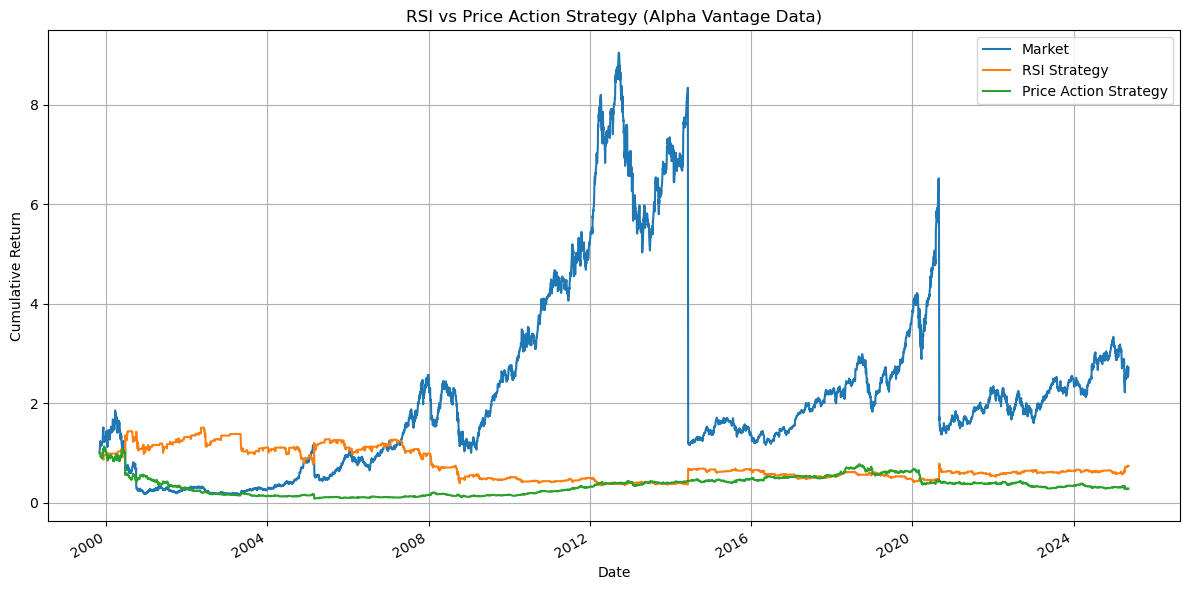

In [21]:
df['Market Return'] = df['Close'].pct_change()
df['RSI_Strategy'] = df['Market Return'] * df['RSI_Position']
df['PA_Strategy'] = df['Market Return'] * df['PA_Position']

(1 + df[['Market Return', 'RSI_Strategy', 'PA_Strategy']]).cumprod().plot(figsize=(12, 6))
plt.title('RSI vs Price Action Strategy (Alpha Vantage Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(['Market', 'RSI Strategy', 'Price Action Strategy'])
plt.grid(True)
plt.tight_layout()
plt.show()

## Watch the Full Tutorial

📺 [Episode 6 on YouTube] https://youtu.be/DC2XDIEYzkg

🎬 Full Beginner Algo Trading Playlist: https://www.youtube.com/watch?v=4jcVT56qSLo&list=PLUDxdzmiKmX68B9R5LzI6_JBr63bx_Jun

## ☕ Support My Channel

If you enjoy this content and want to support more beginner tutorials:  
👉 [Buy Me a Coffee] https://buymeacoffee.com/datageekismyname

## Follow me on YouTube: 
👉 https://www.youtube.com/@datageekismyname